# Objectives
1. Read, clean, and validate 
    - Missing values: 
      - None, nan, 98 and 99 could be missing values 
      - pounds.value_counts().sort_index() to inspect -> replace the numbers with np.nan
    - Filter: create boolean condition to filter 
    - Boolean in pandas: and &, or |
    - The datese could be **Correct oversampling**
2. Distribution
    - Descrete numbers plot
      - Histogram -> better one: PMF (kde plot is similar) -> probability mass plot 
    - Continuous numbers plot
     - CDF (kde plot is similar) -> cumulative density plot
     - PDF -> probability density plot -> more sensitive to KDE
     - KDE -> Kernel density estimate (bandwidth)
3. Relationship
    - Relationship plots: 
        - **Scatter plot** using plt.plot()
        - **Violin plot**: kde plot, inner =  None
        - **Boxplot** -> log scale 
    - Linear relationship 
        - **Pearson's correlation coefficient**
        - **Simple regression plot** -> scipy.stats plackage -> linregress(xs, ys)
        - **Multiple linear regression** -> statsmodels.formula.api package -> ols model 
    - Non-linear relationship 
    - **Multiple linear regression**
4. Multivariate thinking
    - **Multiple regression**: 
    - Plot multiple regression by using another predicted dataset
    - **Logistic regression**: using binary categorical variable as independent variables

## 1. Read, clean, and validate

### 1.1 DataFrames and Series
- Missing values: 
  - None, nan, 98 and 99 could be missing values 
  - pounds.value_counts().sort_index() to inspect -> replace the numbers with np.nan
- Filter: create boolean condition to filter 
- Boolean in pandas: and &, or |
- The datese could be **Correct oversampling**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [2]:
nsfg = pd.read_hdf('/QXJ/python/datacamp/nsfg.hdf5')
nsfg.head(3)

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843


In [7]:
nsfg.shape

(9358, 10)

In [8]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [9]:
nsfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [10]:
nsfg.isna().sum().sort_values()

caseid             0
outcome            0
prglngth           0
agecon             0
wgt2013_2015       0
agepreg          249
birthwgt_lb1    2873
nbrnaliv        2873
hpagelb         2873
birthwgt_oz1    2967
dtype: int64

**Clean and validate**

<br>

- we can validate the results by comparing them to the codebook, which lists the values and their frequences

In [11]:
nsfg.describe()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,9358.000000,6485.000000,6391.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,65502.392605,1.773990,8.055204,7.213895,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147
std,2953.471315,1.348648,11.178893,8.254885,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982
max,70619.000000,6.000000,99.000000,99.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000


In [12]:
nsfg['agepreg'].value_counts().sort_values()

4350.0     1
908.0      1
825.0      1
4283.0     1
4300.0     1
          ..
2250.0    62
2033.0    63
2158.0    64
2166.0    66
2050.0    67
Name: agepreg, Length: 370, dtype: int64

In [24]:
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

In [14]:
pounds.value_counts().sort_index()
# the frequent value is 6 to 8 pounds
# values of 98 and 99 indicate missing values

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [15]:
pounds.describe()
# the mean does not mean too much cos it includes missing value

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [25]:
# replace 
pounds = pounds.replace([98, 99], np.nan)
pounds.mean()

6.703286384976526

In [27]:
ounces.replace([98, 99], np.nan, inplace = True)

In [28]:
birth_weight = pounds + ounces/16
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

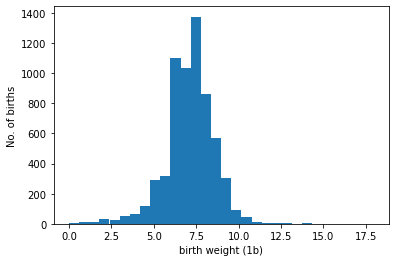

In [31]:
plt.hist(birth_weight.dropna(), bins = 30)
plt.xlabel('birth weight (1b)')
plt.ylabel('No. of births')
plt.show()

In [36]:
preterm=nsfg['prglngth'] < 37
preterm.sum()

3742

In [37]:
preterm.mean()

0.39987176747168196

In [38]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [39]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

## 2. Distribution
- Descrete numbers plot
  - Histogram -> better one: PMF (kde plot is similar) -> probability mass plot 
- Continuous numbers plot
 - CDF (kde plot is similar) -> cumulative density plot
 - PDF -> probability density plot -> more sensitive to KDE
 - KDE -> Kernel density estimate (bandwidth)

**Histogram**: the frequency of a finite samples 
- plt.hist() -> density = True / False 

**PMF**: a probability mass function 
- it contains the unique values in the dataset and how often each one appears: the **probability of discrete numbers** 
- sns.displot(kind='hist' , stat = True/False)
- sns.kdeplot 

vs. **CDF** : cumulative density functin 
- same as PMF but for **continuous numbers and cumulative probability**
- sns.displot(kind = 'kde', cumulatvie = True)

vs.**PDF**: probability density function
- same as kde but less smooth because it is more sensitive

vs. **KDE**: kernel density estimate 
- estimate the function of the probability density of non-parametric and **continuous** data sets
- use kde if there are a lot of values

*ecdf: represents the proportion or count of observations falling below each unique value in a dataset, only for Univariate* 

> 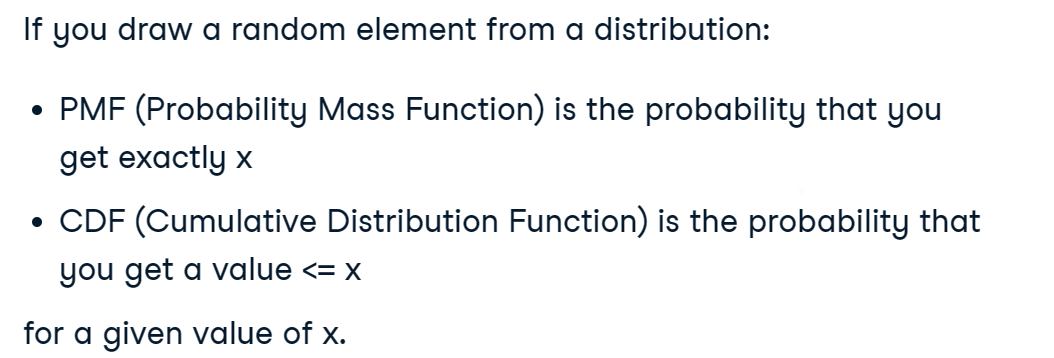
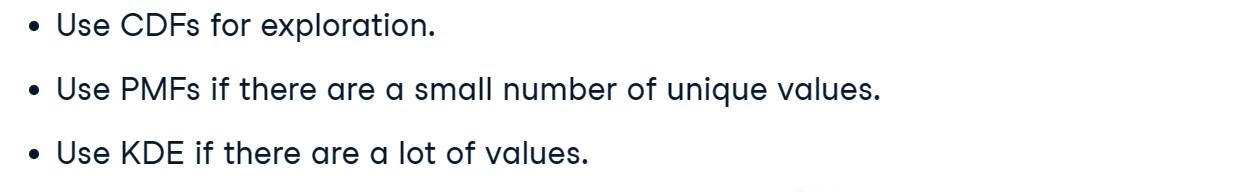

In [130]:
gss = pd.read_hdf('/QXJ/Python/Datacamp/gss.hdf5')
print(gss.head(3))

   year   age  cohort  sex  race  educ  realinc  gunlaw  grass  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0     2.0    NaN   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0     1.0    NaN   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0     1.0    NaN   1.3339


In [131]:
gss.drop('grass', axis = 1, inplace = True)
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'wtssall'],
      dtype='object')

In [132]:
gss.to_hdf('/QXJ/Python/Datacamp/gss_1.hdf5', key = 'gss')

In [103]:
gss = pd.read_hdf('/QXJ/Python/Datacamp/gss_1.hdf5')
print(gss.head(3))

   year   age  cohort  sex  race  educ  realinc  wtssall
0  1972  26.0  1946.0    1     1  18.0  13537.0   0.8893
1  1972  38.0  1934.0    2     1  12.0  18951.0   0.4446
2  1972  57.0  1915.0    1     1  12.0  30458.0   1.3339


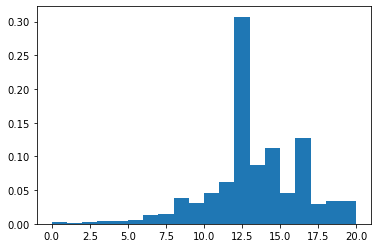

In [28]:
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ', bins = 20, density = True)
plt.show()

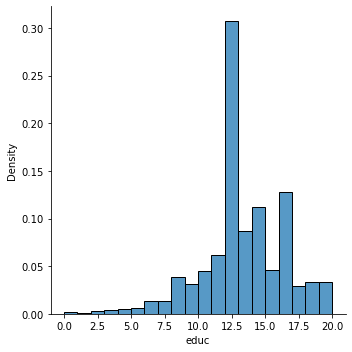

In [37]:
sns.displot(educ, kind = 'hist',  stat = 'density', bins = 20)
plt.show()

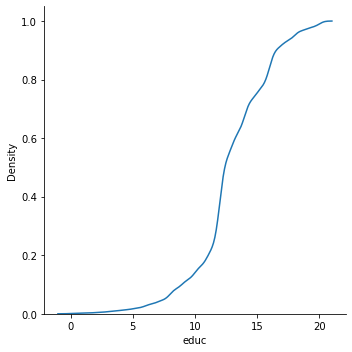

In [44]:
sns.displot(educ, kind='kde', cumulative = True)
plt.show()

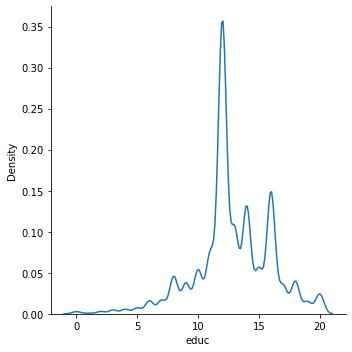

In [40]:
sns.displot(educ, kind='kde')
plt.show()

**random.normal(loc=0.0, scale=1.0, size=None)**
- Draw random samples from a normal (Gaussian) distribution.

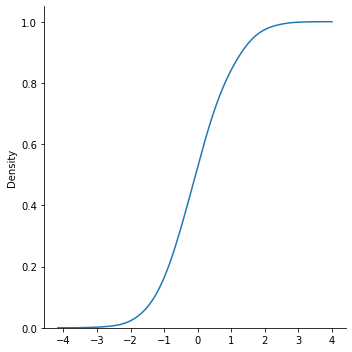

In [46]:
samples = np.random.normal(size = 1000)
sns.displot(samples, kind = 'kde', cumulative = True)
plt.show()
# cdf curve

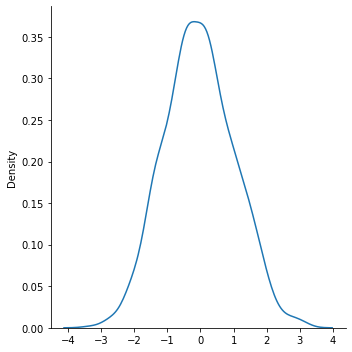

In [47]:
samples = np.random.normal(size = 1000)
sns.displot(samples, kind = 'kde')
plt.show()
# pdf

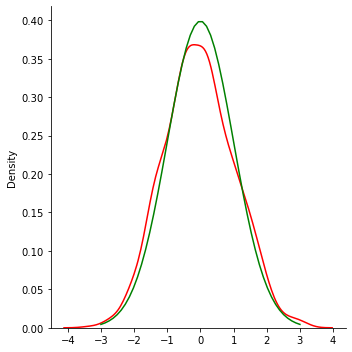

In [53]:
# kde vs pdf
from scipy.stats import norm 
xs = np.linspace(-3,3)
ys = norm.pdf(xs)
# kde
sns.displot(samples, kind = 'kde', color = 'red')
# pdf 
plt.plot(xs,ys, color = 'green')
plt.show()

## 3. Relationship
- Relationship plots: 
    - **Scatter plot** using plt.plot()
    - **Violin plot**: kde plot, inner =  None
    - **Boxplot** -> log scale 
- Linear relationship 
    - **Pearson's correlation coefficient**
    - **Simple regression plot** -> scipy.stats plackage -> linregress(xs, ys)
    - **Multiple linear regression** -> statsmodels.formula.api package -> ols model 
- Non-linear relationship 
    - **Multiple linear regression**

In [56]:
brfss = pd.read_hdf('/QXJ/Python/Datacamp/brfss.hdf5')
brfss.head(2)

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5


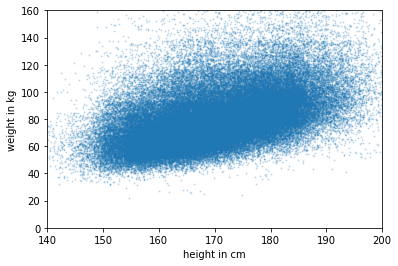

In [65]:
height = brfss['HTM4']
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight = brfss['WTKG3']
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
# similar to scatteplot 
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.2, markersize = 1)
plt.xlabel('height in cm')
plt.ylabel('weight in kg')
# zoom in
plt.axis([140, 200, 0, 160])
plt.show()

**Violin plot**: kde plot
<br>
**Boxplot**

In [71]:
brfss.isna().sum().sort_values()

_LLCPWT         0
SEX            62
_AGEG5YR     1206
AGE          1206
HTM4         4857
_HTMG10      4857
WTKG3        6596
_VEGESU1    12287
INCOME2     16553
dtype: int64

In [67]:
brfss.shape

(100000, 9)

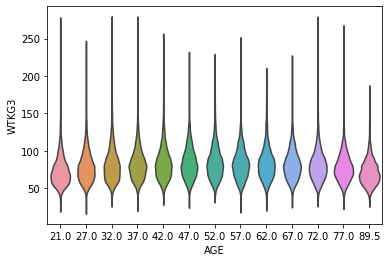

In [74]:
data = brfss.dropna(subset = ['AGE','WTKG3'])
sns.violinplot( x= 'AGE', y='WTKG3', data = brfss, inner = None)
plt.show()

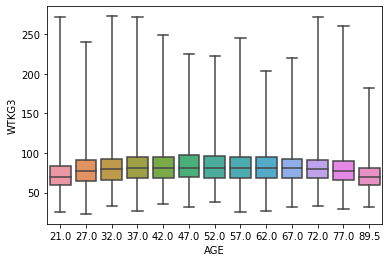

In [79]:
data = brfss.dropna(subset = ['AGE','WTKG3'])
sns.boxplot( x= 'AGE', y='WTKG3', data = brfss, whis = 10)
plt.show()

**Log scale**

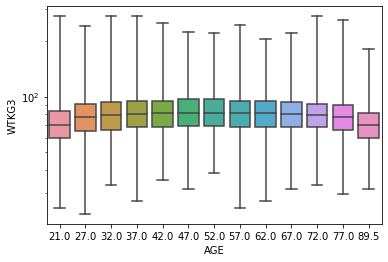

In [80]:
sns.boxplot( x= 'AGE', y='WTKG3', data = brfss, whis = 10)
plt.yscale('log')
plt.show()

**Correlation**:Pearson's correlation coefficient
- only works for the linear relationship 
- correlation says nothing about the slope

In [83]:
columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()
# correlation matrix

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


[[ 1.         -0.03922645]
 [-0.03922645  1.        ]]


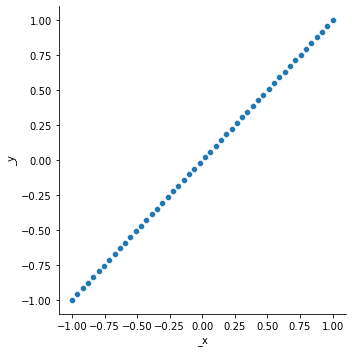

In [90]:
s = np.linspace(-1,1)
ys = xs**2
ys += np.random.normal(0, 0.05, len(xs))
print(np.corrcoef(xs, ys))
sns.relplot(x = xs, y=xs, kind = 'scatter')
plt.show()

**Simple regressoin**
- It estimate the slope of the line
- It only measure the linear regression shap
- Regression is not symmetric, X and y reversed will lead to a big difference
- Regression is not causation

In [92]:
from scipy.stats import linregress
res = linregress(xs,ys)
res
# return the best fit of the data 

LinregressResult(slope=-0.02050908684578867, intercept=0.3549704892551291, rvalue=-0.039226454160221226, pvalue=0.7868052819224317, stderr=0.07540710506058729, intercept_stderr=0.044415922726692765)

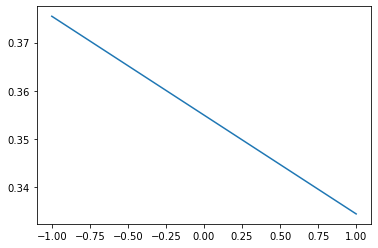

In [93]:
# get the best fit line
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

In [94]:
subset = brfss.dropna(subset = ['HTM4','WTKG3'])

In [96]:
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs, ys)
res

LinregressResult(slope=0.9192115381848297, intercept=-75.12704250330233, rvalue=0.47420308979024584, pvalue=0.0, stderr=0.005632863769802998, intercept_stderr=0.9608860265433182)

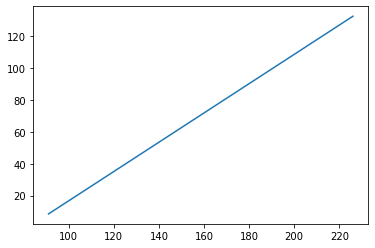

In [97]:
# get the best fit line
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

## 4. Multivariate thinking
- Multiple regression: Scipy does not but StatsModels
- Plot multiple regression by using another predicted dataset
- Logistic regression: using binary categorical variable as independent variables

In [98]:
import statsmodels.formula.api as smf

In [101]:
results = smf.ols('INCOME2~_VEGESU1', data = brfss).fit()
results.params

Intercept    5.450700
_VEGESU1     0.204935
dtype: float64

**Multiple regression**
- can measure non-linear relationship

In [106]:
results = smf.ols('realinc ~ educ', data = gss).fit()
results.params

Intercept   -11539.147837
educ          3586.523659
dtype: float64

In [107]:
# add age 
results = smf.ols('realinc ~ educ + age', data = gss).fit()
results.params

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64

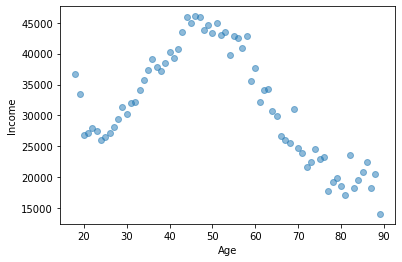

In [120]:
# rellation and age
grouped = gss.groupby('age')['realinc'].mean()
plt.plot(grouped, 'o', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [114]:
# dding a quadratic term
gss['age2'] = gss['age'] ** 2
gss['educ2'] = gss['educ'] **2
mdl = smf.ols('realinc ~ educ + age + age2 + educ2', data = gss).fit()
mdl.params
# age2 is hard to interprete

Intercept   -23241.884034
educ          -528.309369
age           1696.717149
age2           -17.196984
educ2          159.966740
dtype: float64

In [117]:
# understand a model by predicting
df = pd.DataFrame()
df['age'] = np.linspace(18,85)
df['age2'] = df['age'] ** 2

df['educ'] = 14
df['educ2'] = df['educ'] ** 2
pred14 = mdl.predict(df)
pred14[:3]

0    25684.351721
1    27125.687837
2    28502.719695
dtype: float64

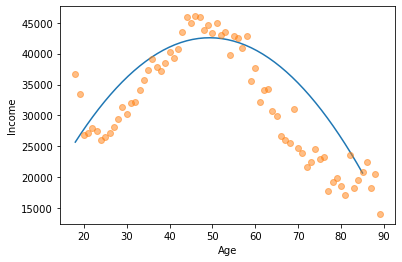

In [123]:
plt.plot(df['age'], pred14, label = 'Associate')
plt.plot(grouped, 'o', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

**Logistic Regression**
- Categorical as part of the regression model 
- Boolean variable 

In [124]:
formula = 'realinc ~ educ + age + age2 + educ2 + C(sex)' 
mdl = smf.ols(formula, data = gss).fit()
mdl.params
# sex: default man == 1 

Intercept     -22369.453641
C(sex)[T.2]    -4156.113865
educ            -310.247419
age             1703.047502
age2             -17.238711
educ2            150.514091
dtype: float64

In [133]:
# Boolean variable
gss['gunlaw'].value_counts()

1.0    30918
2.0     9632
Name: gunlaw, dtype: int64

In [135]:
gss['gunlaw'].replace([2],[0], inplace = True)
gss['gunlaw'].value_counts()

1.0    30918
0.0     9632
Name: gunlaw, dtype: int64

In [137]:
gss['age2'] = gss['age'] ** 2
gss['educ2'] = gss['educ'] **2
formula = 'gunlaw ~ educ + age + age2 + educ2 + C(sex)' 
mdl = smf.logit(formula, data = gss).fit()
mdl.params
# positive numbers more likely cause the result and negatvie vice verse

Optimization terminated successfully.
         Current function value: 0.533674
         Iterations 6


Intercept      1.653862
C(sex)[T.2]    0.757249
educ          -0.124373
age           -0.018849
age2           0.000189
educ2          0.006653
dtype: float64

In [138]:
# to examine how much likely 
df = pd.DataFrame()
df['age'] = np.linspace(18,85)
df['age2'] = df['age'] ** 2

df['educ'] = 12
df['educ2'] = df['educ'] ** 2

df['sex'] = 1
pred1 = mdl.predict(df)

df['sex'] = 2
pred2 = mdl.predict(df)

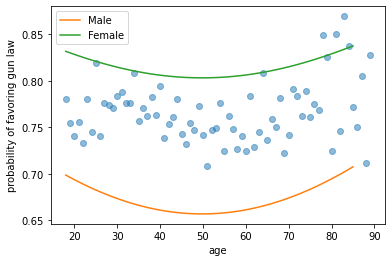

In [141]:
grouped = gss.groupby('age')['gunlaw'].mean()
plt.plot(grouped, 'o', alpha = 0.5)
plt.plot(df['age'], pred1, label = 'Male')
plt.plot(df['age'], pred2, label = 'Female')

plt.xlabel('age')
plt.ylabel('probability of favoring gun law')
plt.legend()
plt.show()

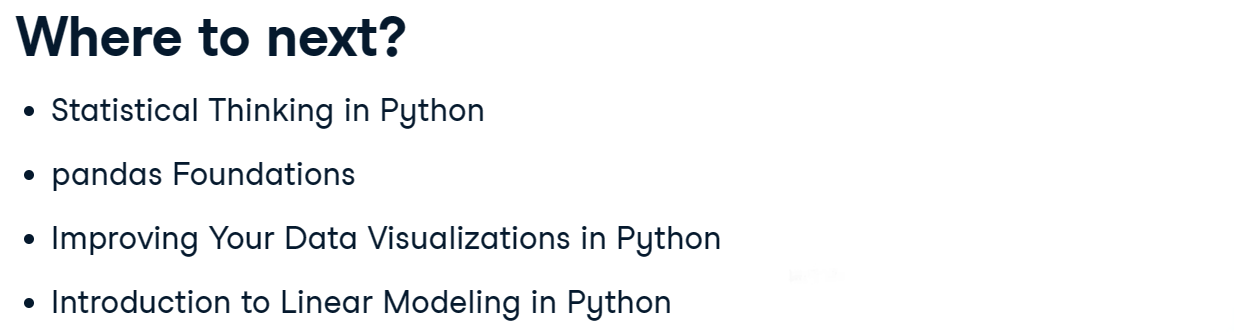